<a href="https://colab.research.google.com/github/hebaio/text-mining-lecture/blob/main/Lecture_5_Time_Series_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
# Load the data from the CSV file
df = pd.read_csv('/gdrive/MyDrive/ML_Workshop/Electric_Production.csv')

# Convert the string containing the date into an actual date
df['DATE'] = pd.to_datetime(df['DATE'], infer_datetime_format=True)

# When working with time series data, it is important to set the Date as an index column
df = df.set_index(['DATE'])
df.head()

,ELECTRICITY
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


# Building a sliding window. 

Image we want to predict the energy consumption of the next month, using the data of the last three months. Luckily pandas provides us with an handy .shift() function that simply shifts the time series by an period x. 

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shift.html

In [ ]:
# Move the ELECTRICITY column by either 1, 2 or 3 periods and add them to the new 
df['ELECTRICITY_1_MONTH'] = df['ELECTRICITY'].shift(1)
df['ELECTRICITY_2_MONTH'] = df['ELECTRICITY'].shift(2)
df['ELECTRICITY_3_MONTH'] = df['ELECTRICITY'].shift(3)
df.head()

,ELECTRICITY,ELECTRICITY_1_MONTH,ELECTRICITY_2_MONTH,ELECTRICITY_3_MONTH
DATE,,,,
1985-01-01,72.5052,NaN,NaN,NaN
1985-02-01,70.6720,72.5052,NaN,NaN
1985-03-01,62.4502,70.6720,72.5052,NaN
1985-04-01,57.4714,62.4502,70.6720,72.5052
1985-05-01,55.3151,57.4714,62.4502,70.6720


# Create statistical measurements through .rolling()

Using the rolling function we can calculate statistics for a rolling window of 3 time periods. We can also use different aggregate functions like .mean(), .sum() or .std().   

When using the standard rolling window we would also add the electricity value of the current month. This is very bad for machine learning, because we would leak information of the target variable in the feature (we would integrate information in our feature, which would normally not be available). To prevent this, we need to also shift our averaged rolling window



In [ ]:
# Calculate the mean and the standard deviation for an rolling window of 3 months and then shift it one period 
# This prevents the information leak
df['MEAN_ELECTRICITY_3_MONTH'] = df['ELECTRICITY'].rolling(3).mean().shift(1)
df['STD_ELECTRICITY_3_MONTH'] = df['ELECTRICITY'].rolling(3).std().shift(1)
df.head()

,ELECTRICITY,ELECTRICITY_1_MONTH,ELECTRICITY_2_MONTH,ELECTRICITY_3_MONTH,MEAN_ELECTRICITY_3_MONTH,STD_ELECTRICITY_3_MONTH
DATE,,,,,,
1985-01-01,72.5052,NaN,NaN,NaN,NaN,NaN
1985-02-01,70.6720,72.5052,NaN,NaN,NaN,NaN
1985-03-01,62.4502,70.6720,72.5052,NaN,NaN,NaN
1985-04-01,57.4714,62.4502,70.6720,72.5052,68.542467,5.355085
1985-05-01,55.3151,57.4714,62.4502,70.6720,63.531200,6.666362


In [ ]:
# Tail shows us the last 5 data entries
df.tail()

,ELECTRICITY,ELECTRICITY_1_MONTH,ELECTRICITY_2_MONTH,ELECTRICITY_3_MONTH,MEAN_ELECTRICITY_3_MONTH,STD_ELECTRICITY_3_MONTH
DATE,,,,,,
2017-09-01,98.6154,108.9312,112.1538,102.1532,107.746067,5.104548
2017-10-01,93.6137,98.6154,108.9312,112.1538,106.566800,7.072118
2017-11-01,97.3359,93.6137,98.6154,108.9312,100.386767,7.810874
2017-12-01,114.7212,97.3359,93.6137,98.6154,96.521667,2.598362
2018-01-01,129.4048,114.7212,97.3359,93.6137,101.890267,11.266691


# Modelling

First we need to check if we have NaN values in our dataset. As we can see, due to the shifting we have some rows with nan values. We could use one of our imputing techniques, but in this case we will simply drop these 3 rows. Since we only want to drop the rows we specifiy axis=0 (rows).

Source: https://stackoverflow.com/a/49884677

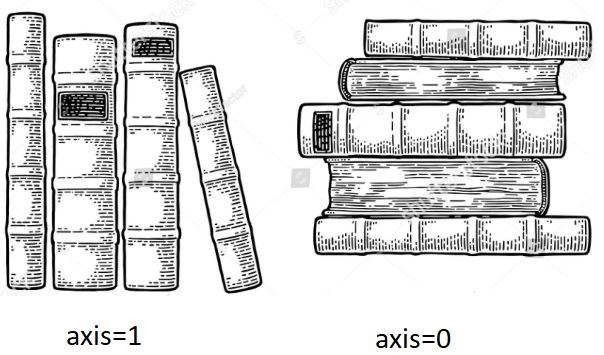

In [ ]:
# Dropping the nan values does create a new dataframe
df_no_nan = df.dropna(axis=0)
df_no_nan.head()

,ELECTRICITY,ELECTRICITY_1_MONTH,ELECTRICITY_2_MONTH,ELECTRICITY_3_MONTH,MEAN_ELECTRICITY_3_MONTH,STD_ELECTRICITY_3_MONTH
DATE,,,,,,
1985-04-01,57.4714,62.4502,70.6720,72.5052,68.542467,5.355085
1985-05-01,55.3151,57.4714,62.4502,70.6720,63.531200,6.666362
1985-06-01,58.0904,55.3151,57.4714,62.4502,58.412233,3.659411
1985-07-01,62.6202,58.0904,55.3151,57.4714,56.958967,1.456885
1985-08-01,63.2485,62.6202,58.0904,55.3151,58.675233,3.687498


# Cross validation

Attention. For time series data we cannot use the regular kFold split, because it would append information from future time periods into our training set. Therefore we will use the TimeSeriesSplit function. For a detailed explanation on the effect of different cross validation techniques on time series data, see: https://www.kaggle.com/code/tomwarrens/timeseriessplit-how-to-use-it/notebook

We could also use a regular train-test-split but, TimeSeriesSplit does provide a more robust evaluation of our model performance, because we permutate the 

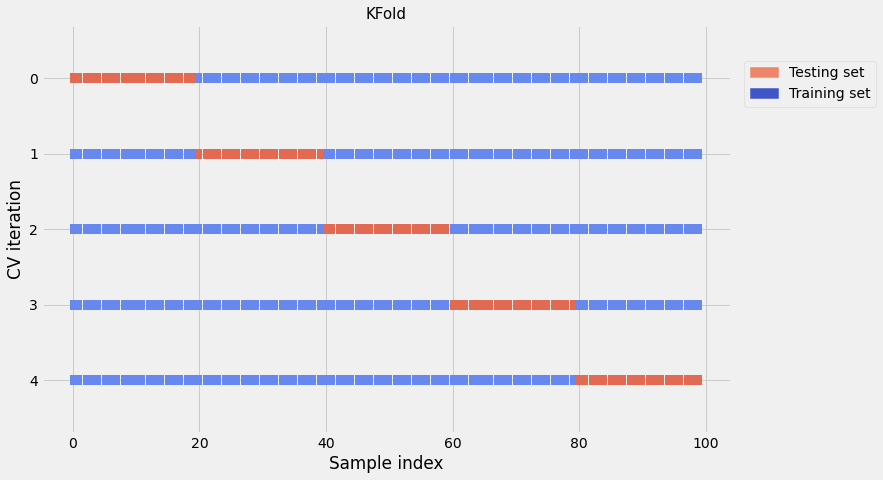

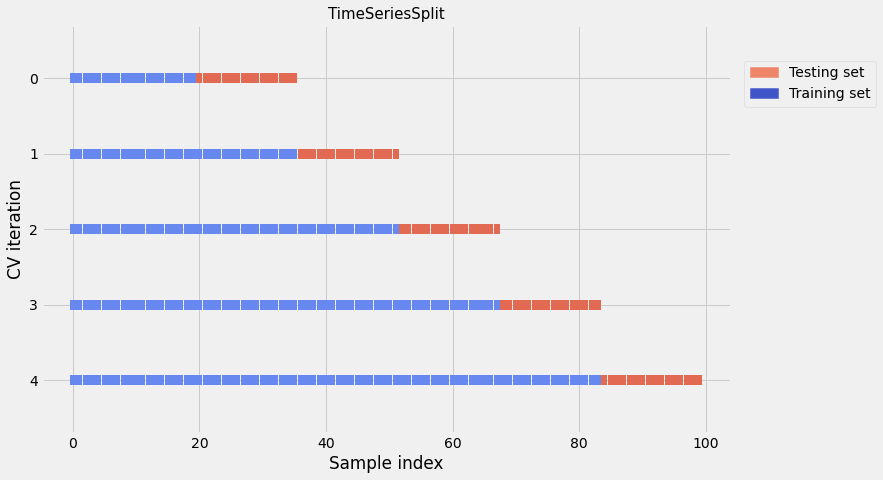

In [ ]:
from sklearn.model_selection import TimeSeriesSplit, cross_validate
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, make_scorer

from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.svm import SVR

In [ ]:
# Defines the column names of all the columns we want to use for training
features = [
        'ELECTRICITY_1_MONTH',
        'ELECTRICITY_2_MONTH',
        'ELECTRICITY_3_MONTH',
        'MEAN_ELECTRICITY_3_MONTH',
        'STD_ELECTRICITY_3_MONTH'
    ]

# We extract our training features into the x_data variables
x_data = df_no_nan[features]

# The electricity of our current month is our prediction target
y_data = df_no_nan['ELECTRICITY']

In [ ]:
scorings = {
    'mean_squared_error':make_scorer(mean_squared_error),
    'r2_score':make_scorer(r2_score), 
    'mean_absolute_error':make_scorer(mean_absolute_error)
}

In [ ]:
# Init a new TimeSeriesSplit as CV
tscv = TimeSeriesSplit(n_splits = 5)

# We use a standard RandomForestRegressor and a Support Vector Regressor.
# But you can use any sort of regression algorithm in SKLEARN. 
estim_rf = ExtraTreesRegressor()
estim_svr = SVR()

# We also use the cross_validate function, because in this tutorial we do not inspect the predictions inside any further
# Also we cannot inspect a confusion matrix for regression
cv_scores_rf = cross_validate(estim_rf, x_data, y_data, cv = tscv, scoring = scorings)
cv_scores_svr = cross_validate(estim_svr, x_data, y_data, cv = tscv, scoring = scorings)

In [ ]:
print(cv_scores_rf)
print(cv_scores_svr)

{'fit_time': array([0.08538818, 0.0937283 , 0.10323691, 0.12221217, 0.12692642]), 'score_time': array([0.01009607, 0.01149273, 0.01140571, 0.01123667, 0.01747346]), 'test_mean_squared_error': array([65.9177963 , 76.06263864, 92.22996134, 45.10979545, 51.25023072]), 'test_r2_score': array([-0.23331092, -0.30798039, -0.30458433,  0.48624359,  0.45689942]), 'test_mean_absolute_error': array([6.18194303, 6.78380074, 7.76843232, 4.91896528, 5.16478   ])}
{'fit_time': array([0.00269055, 0.0031991 , 0.0043633 , 0.00620747, 0.00814438]), 'score_time': array([0.00234318, 0.00256777, 0.00276899, 0.00313878, 0.00346231]), 'test_mean_squared_error': array([155.51470017, 187.86410276, 224.03572584, 162.81138353,
       138.47437794]), 'test_r2_score': array([-1.90965398, -2.23052904, -2.16896477, -0.85426229, -0.46741808]), 'test_mean_absolute_error': array([10.46721401, 11.87514471, 13.04471661, 10.15308497,  9.1930824 ])}


In [ ]:
print('Results for Random forest')
for score_name, scores in cv_scores_rf.items():

    # Calculate the mean and standard deviation for evey score
    mean_score = np.mean(scores)
    std_score = np.std(scores)

    # Print the scores but limit it to 4 decimals
    print(f'{score_name}: {mean_score:.4f}, (+- {std_score:.4f})')

    # One line Version:
    # print(f'{score_name}: {np.mean(scores):.4f}, (+- {np.std(scores):.4f})')

print('\nResults for Support Vector regression')
for score_name, scores in cv_scores_svr.items():

    # Calculate the mean and standard deviation for evey score
    mean_score = np.mean(scores)
    std_score = np.std(scores)

    # Print the scores but limit it to 4 decimals
    print(f'{score_name}: {mean_score:.4f}, (+- {std_score:.4f})')

    # One line Version:
    # print(f'{score_name}: {np.mean(scores):.4f}, (+- {np.std(scores):.4f})')

Results for Random forest
fit_time: 0.1063, (+- 0.0160)
score_time: 0.0123, (+- 0.0026)
test_mean_squared_error: 66.1141, (+- 16.9892)
test_r2_score: 0.0195, (+- 0.3702)
test_mean_absolute_error: 6.1636, (+- 1.0495)

Results for Support Vector regression
fit_time: 0.0049, (+- 0.0020)
score_time: 0.0029, (+- 0.0004)
test_mean_squared_error: 173.7401, (+- 29.7470)
test_r2_score: -1.5262, (+- 0.7251)
test_mean_absolute_error: 10.9466, (+- 1.3564)


# Interpretation
We can see that our model is performing not very well. In fact the performance metrics are really bad.

Note: Normally the R2 score cannot be smaller than zero. However in sklearn a r2 score < 0, indidates a model which is worse than a pure chance regressor. 